In [445]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway
import statsmodels.api as sm 
 
df = pd.read_csv('insurance.csv')

#print(df.head())
#print(df.dtypes)
#print(df.isnull().value_counts())

Insurance Project

Objectives-
1. Gender wise insurance charges analysis
2. Understand the relationship between the variables using data visualization

In [446]:
#print(df.describe())

In [447]:
#region_proportion = round(df['region'].value_counts()/len(df['bmi']),2)

#print(region_proportion)

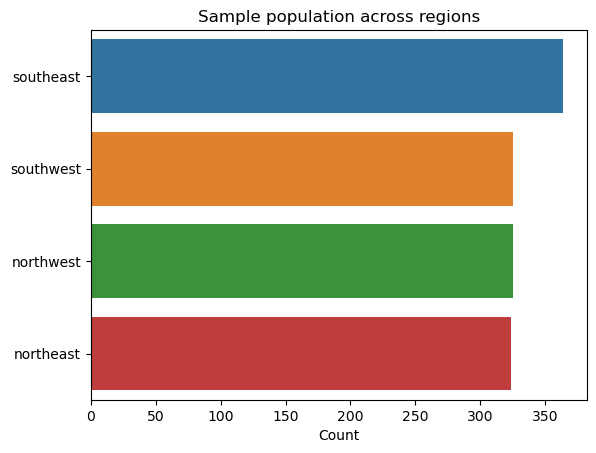

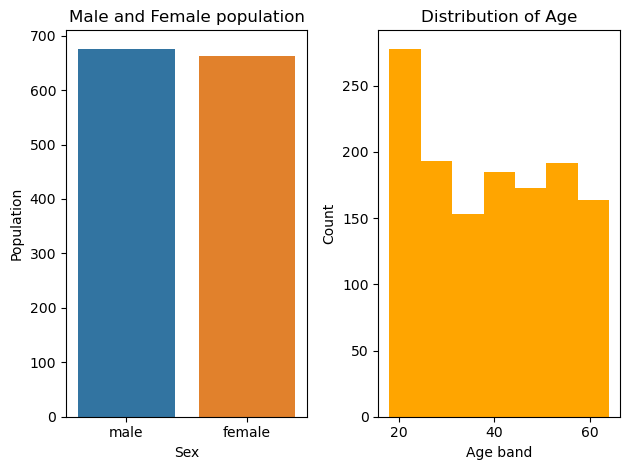

<Figure size 640x480 with 0 Axes>

In [448]:
region_distribution = df['region'].value_counts()

sns.barplot(x=region_distribution.values, y=region_distribution.index)
plt.title("Sample population across regions")
plt.xlabel("Count")
plt.show()

male_female_count = df['sex'].value_counts()

plt.subplot(121)
sns.barplot(x=male_female_count.index, y= male_female_count.values, data=df)
plt.title("Male and Female population")
plt.ylabel("Population")
plt.xlabel("Sex")

plt.subplot(122)
plt.hist(df['age'], bins=7, color='orange')
plt.title("Distribution of Age")
plt.ylabel("Count")
plt.xlabel("Age band")
plt.tight_layout()
plt.show()

plt.clf()

In [449]:
male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']

print(f"Male mean age is: {male_df['age'].mean()}")
print(f"Female mean age is: {female_df['age'].mean()}")

print("--------------------------------------")
print(male_df['charges'].describe())
print("--------------------------------------")
print(female_df['charges'].describe())


Male mean age is: 38.917159763313606
Female mean age is: 39.503021148036254
--------------------------------------
count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64
--------------------------------------
count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64


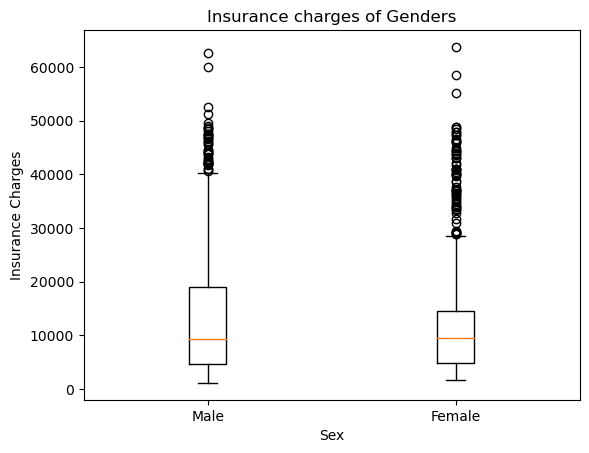

Male smoker proportion
no     0.76
yes    0.24
Name: smoker, dtype: float64
---------------------------------------------------------
Female smoker proportion
no     0.83
yes    0.17
Name: smoker, dtype: float64


In [450]:
gender_charges_data = (male_df['charges'], female_df['charges'])

plt.boxplot(gender_charges_data, labels=('Male', 'Female'))
plt.title("Insurance charges of Genders")
plt.xlabel('Sex')
plt.ylabel("Insurance Charges")
plt.show()

print("Male smoker proportion")
print(round(male_df['smoker'].value_counts()/len(male_df),2))
print("---------------------------------------------------------")
print("Female smoker proportion")
print(round(female_df['smoker'].value_counts()/len(female_df),2))

As per above box plot, we can observe that Male Insurance charges are spread out more than female Insurance charges, indicating there is more variance in male insurance charges
Female insurance charges range is more than male insurance charges, indicating that a few females have a higher insurance premium than that of the males

In [451]:
print(f"Maximum smoker charges are: {smoker_df['charges'].max()}")
print(f"Maximum non - smoker charges are: {non_smoker_df['charges'].max()}")

print(df[df['charges'] == 63770.42801])
print(df[df['charges'] == 36910.60803])

Maximum smoker charges are: 63770.42801
Maximum non - smoker charges are: 36910.60803
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801
      age     sex   bmi  children smoker     region      charges
1206   59  female  34.8         2     no  southwest  36910.60803


Now, to test if increasing age indicates increase in premium charged

Let's test the correlation between numerical variables in the data set with Insurance charges using pearsonr

In [452]:
 numerical_variables = ['bmi', 'children', 'age']

for c in numerical_variables:
    correlation, p_value = stats.pearsonr(df[c], df['charges'])
    print("----------------------------------------------------------")
    print(f"The correlation coefficient for {c} is: {correlation}")
    print(f"The p_value for {c} is: {p_value}")

----------------------------------------------------------
The correlation coefficient for bmi is: 0.1983409688336289
The p_value for bmi is: 2.459085535116766e-13
----------------------------------------------------------
The correlation coefficient for children is: 0.06799822684790481
The p_value for children is: 0.012852128520136417
----------------------------------------------------------
The correlation coefficient for age is: 0.29900819333064765
The p_value for age is: 4.886693331718192e-29


Observations:

1. There is a weak positive relation between all the numerical variables and insurance charges
2. The correlation(s) are statistically not significant except for number of children variable, which has a very weak positive relationship
3. Further the scatter plot illustrates the effect of smoking on insurance charges

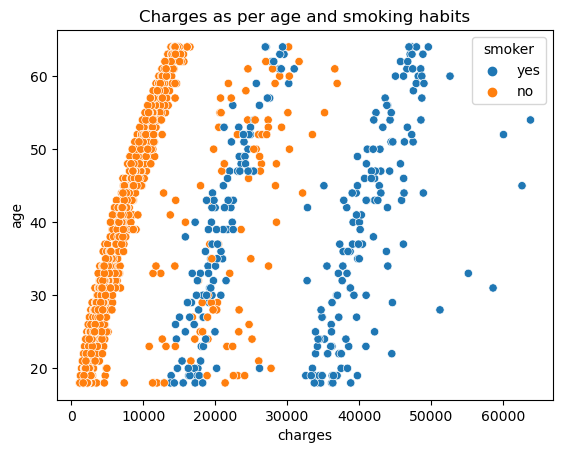

In [453]:
sns.scatterplot(x='charges', y='age',hue='smoker', data=df)
plt.title("Charges as per age and smoking habits")
plt.show()

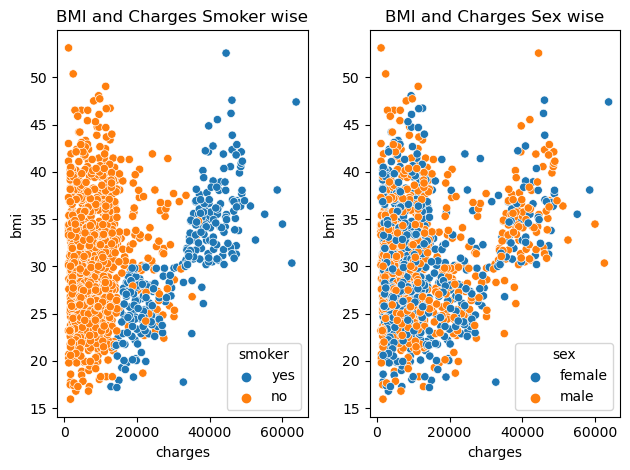

<Figure size 640x480 with 0 Axes>

In [454]:
plt.subplot(121)
sns.scatterplot(x='charges', y='bmi', hue='smoker', data=df)
plt.title("BMI and Charges Smoker wise")
plt.subplot(122)
sns.scatterplot(x='charges',y='bmi', hue='sex',data=df)
plt.title("BMI and Charges Sex wise")
plt.tight_layout()
plt.show()
plt.clf()

As per above data visualized, it can be observed that BMI does not play a major role in deciding Insurance charges

Lets check the correlation coefficient of BMI and insurance charges to confirm

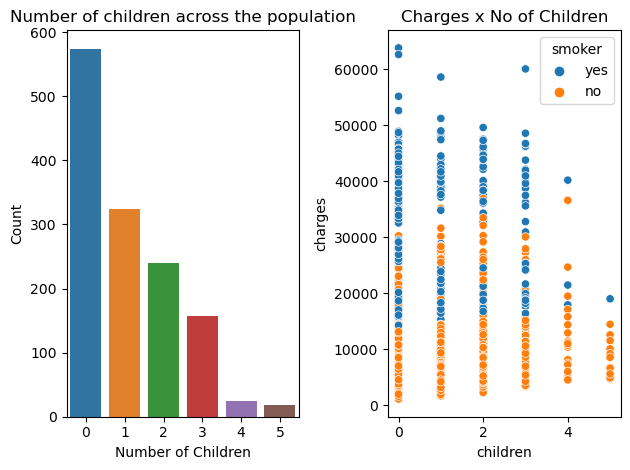

<Figure size 640x480 with 0 Axes>

In [455]:
children_value_count = df['children'].value_counts()

plt.subplot(121)
sns.barplot(x=children_value_count.index, y=children_value_count.values, data=df)
plt.title("Number of children across the population")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.subplot(122)
sns.scatterplot(x='children', y='charges',hue='smoker', data=df)
plt.title("Charges x No of Children")
plt.tight_layout()
plt.show()
plt.clf()

Now, lets test the correlation between categorical varaiables and Insurance charges

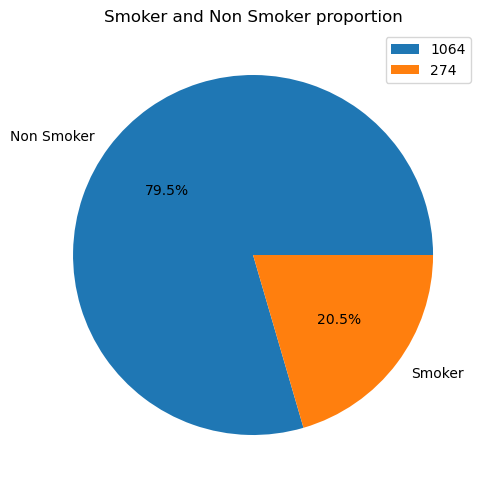

<Figure size 640x480 with 0 Axes>

In [456]:
bar_smoker_pop = df['smoker'].value_counts()

plt.pie(bar_smoker_pop, autopct = '%1.1f%%', labels=("Non Smoker", "Smoker"))
plt.tight_layout()
plt.title("Smoker and Non Smoker proportion")
plt.legend(bar_smoker_pop)
plt.show()
plt.clf()

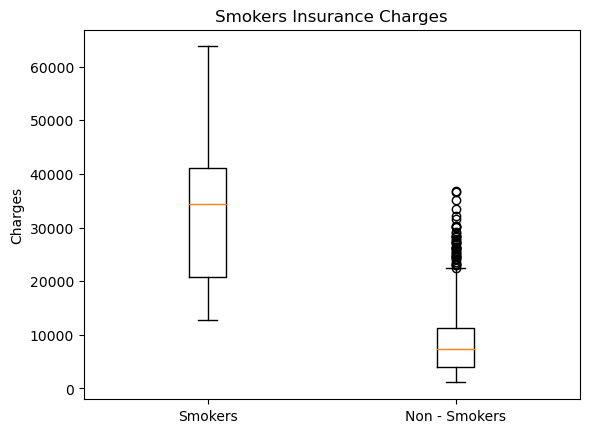

<Figure size 640x480 with 0 Axes>

In [457]:
plt.boxplot(df_smoker, labels = ('Smokers', 'Non - Smokers'))
plt.title("Smokers Insurance Charges")
plt.ylabel("Charges")
plt.show()
plt.clf()


1. The median value of Smokers premium is much higher than that of the non-smokers, i.e. $34456.34
2. The variance is also large in smoker charges
3. Non smokers have a high number of outliers but less variance in the IQR

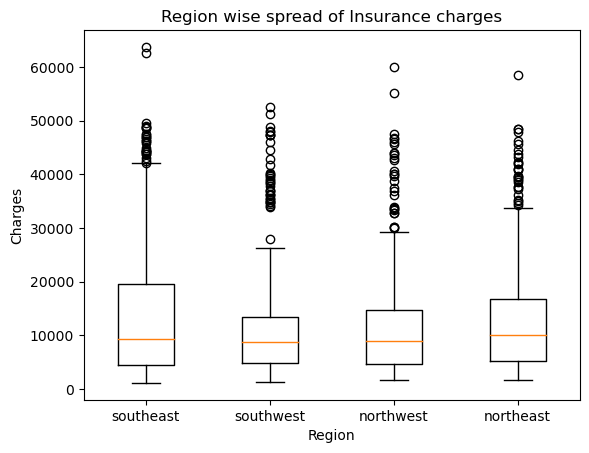

The below count is as per list: 
southeast, southwest, northwest, northeast
----------------------------------------
The smoker counts for the region is: 
no     273
yes     91
Name: smoker, dtype: int64
----------------------------------------
The smoker counts for the region is: 
no     267
yes     58
Name: smoker, dtype: int64
----------------------------------------
The smoker counts for the region is: 
no     267
yes     58
Name: smoker, dtype: int64
----------------------------------------
The smoker counts for the region is: 
no     257
yes     67
Name: smoker, dtype: int64
----------------------------------------


In [458]:
southeast_df = df[df['region'] == 'southeast']
southwest_df = df[df['region'] == 'southwest']
northwest_df = df[df['region'] == 'northwest']
northeast_df = df[df['region'] == 'northeast']

region_list = [southeast_df, southwest_df, northwest_df, northeast_df]

region_charges = (southeast_df['charges'], southwest_df['charges'],northwest_df['charges'],northeast_df['charges'])

plt.boxplot(region_charges, labels = ('southeast', 'southwest', 'northwest', 'northeast'))
plt.title("Region wise spread of Insurance charges")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

print("The below count is as per list: ")
print("southeast, southwest, northwest, northeast")
print("----------------------------------------")
for r in region_list:
    s_count = r['smoker'].value_counts()
    print(f"The smoker counts for the region is: ")
    print(s_count)
    print("----------------------------------------")

Observations:
1. Highest median value is of Northeast with the lowest belonging to southwest region
2. South east IQR has the largest variability with southwest being of the lowest variablility
3. The 25 percentile of data is similar for all the regions, bu there is significant variance in the 75 percentile and above with southwest again having the least variability amongst the regions
4. Southeast has the highest number of smokers, thus the insurance charges are also relatively high

Finally, we can conculde that only smoker variable has a significant positive correlation with charges

Prediction model is as per below

In [459]:
model = sm.OLS.from_formula("charges~smoker", data=df)
results = model.fit()

print(results.params)

Intercept         8434.268298
smoker[T.yes]    23615.963534
dtype: float64
